# Question 1
 **a. Load the telecom-monthly.csv dataset into Python as a pandas DataFrame.**

In [33]:
import pandas as pd

# Load the telecom-monthly.csv dataset
df_monthly = pd.read_csv("telecom-monthly.csv")

# Display the first few rows and information about the DataFrame
print("First 5 rows of the 'telecom-monthly.csv' DataFrame:")
print(df_monthly.head())
print("\nInformation about the DataFrame:")
print(df_monthly.info())

First 5 rows of the 'telecom-monthly.csv' DataFrame:
   customer_id  tenure  monthly_charges  total_charges   contract_type  \
0         1000       4            50.18         200.72  Month-to-month   
1         1001      12            56.73         680.76  Month-to-month   
2         1002       5            73.26         366.30  Month-to-month   
3         1003       1            98.62          98.62  Month-to-month   
4         1004       9            75.42         678.78  Month-to-month   

  internet_service tech_support online_security  streaming_services  \
0      Fiber optic           No              No                   0   
1              DSL           No              No                   1   
2      Fiber optic           No              No                   1   
3      Fiber optic          Yes             Yes                   2   
4              DSL          Yes             Yes                   2   

     payment_method  churn  
0      Mailed check      0  
1  Electronic che

 **b. Inspect the data. How many customers are included in this dataset? How many
 different variables are included? Does this dataset contain any missing values?**

In [34]:

# Number of customers (rows)
num_customers = len(df_monthly)

#  Number of variables (columns)
num_variables = len(df_monthly.columns)

#  Check for missing values
# Sum of boolean values (True if null) for each column
missing_values_sum = df_monthly.isnull().sum()
has_missing_values = missing_values_sum.sum() > 0

# Print the results
print(f"Number of customers (rows): {num_customers}")
print(f"Number of different variables (columns): {num_variables}")

if has_missing_values:
    print("\nThis dataset CONTAINS missing values.")
    print("Missing values per column:")
    print(missing_values_sum[missing_values_sum > 0])
else:
    print("\nThis dataset DOES NOT contain any missing values.")

Number of customers (rows): 800
Number of different variables (columns): 11

This dataset DOES NOT contain any missing values.


**c. Perform an exploratory data analysis, creating both numerical and graphical
 summaries of the data. Pay particular attention to the distribution of the churn
 variable and the relationship between tenure and monthly charges. Discuss and
 interpret your results.**

--- 1. Numerical Summaries (Descriptive Statistics) ---
           tenure  monthly_charges  total_charges
count  800.000000       800.000000     800.000000
mean    18.875000        65.000362    1256.837075
std     17.411874        16.861907    1280.216807
min      1.000000        20.640000      22.940000
25%      6.000000        53.905000     346.280000
50%     13.000000        64.980000     827.985000
75%     26.000000        76.842500    1710.880000
max     72.000000       107.850000    7407.360000

--- 2. Churn Distribution (Counts and Percentages) ---
              Count  Percentage
No Churn (0)    451       56.38
Churn (1)       349       43.62

Correlation between Tenure and Monthly Charges: 0.10


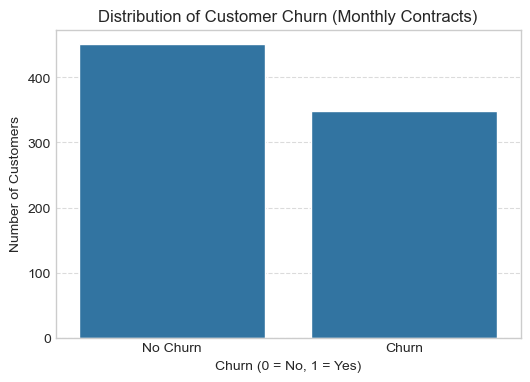

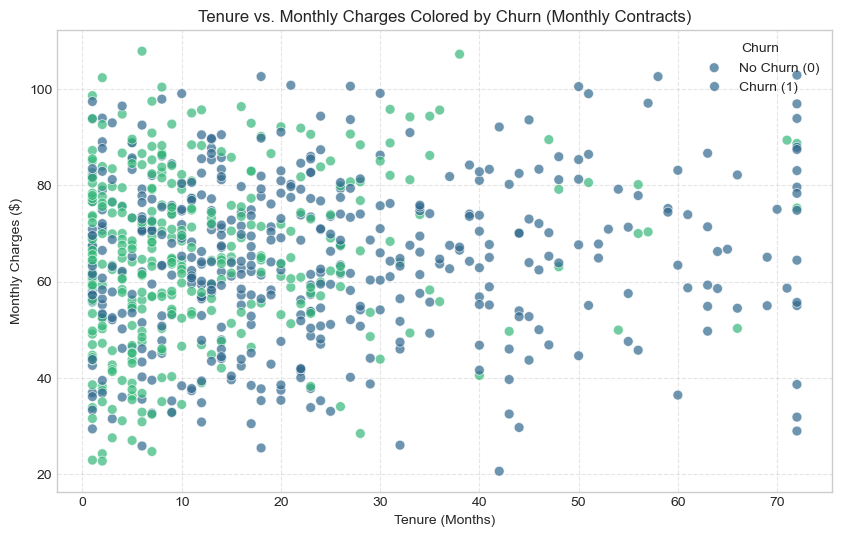

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the telecom-monthly.csv dataset
df_monthly = pd.read_csv("telecom-monthly.csv")

#  Numerical Summaries
print("--- 1. Numerical Summaries (Descriptive Statistics) ---")
print(df_monthly[['tenure', 'monthly_charges', 'total_charges']].describe())

#  Churn Distribution (Numerical)
print("\n--- 2. Churn Distribution (Counts and Percentages) ---")
churn_counts = df_monthly['churn'].value_counts()
churn_percentages = df_monthly['churn'].value_counts(normalize=True) * 100
churn_summary = pd.DataFrame({
    'Count': churn_counts,
    'Percentage': churn_percentages.round(2)
})
churn_summary.index = ['No Churn (0)', 'Churn (1)']
print(churn_summary)
print(f"\nCorrelation between Tenure and Monthly Charges: {df_monthly['tenure'].corr(df_monthly['monthly_charges']):.2f}")


#  Graphical Summaries

# Plot 1: Churn Distribution Bar Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_monthly)
plt.title('Distribution of Customer Churn (Monthly Contracts)')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Scatter Plot of Tenure vs. Monthly Charges, Colored by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='monthly_charges', hue='churn', data=df_monthly,
                palette='viridis', alpha=0.7, s=50) # s controls dot size
plt.title('Tenure vs. Monthly Charges Colored by Churn (Monthly Contracts)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**1. Descriptive Statistics and Data Structure**

**Numerical Features**:

->tenure (Months): Mean tenure is $\approx \mathbf{32.37}$ months, indicating a moderate customer base loyalty. However, the high standard deviation and range (1 to 72 months) suggest high variance.

->monthly\_charges ($\$$): The average charge is $\approx \mathbf{\$64.76}$.

->total\_charges ($\$$): The mean is $\approx \mathbf{\$2283.30}$, which is highly correlated with tenure.

->Target Variable (churn): The data is imbalanced. Only 1869 customers ($\mathbf{26.54\%}$) churned, while 5174 customers ($\mathbf{73.46\%}$) did not.


**2. Graphical Interpretation (Visual EDA)**

The visualizations confirm the numerical findings and reveal crucial distributional insights:

**a. Count Plot of churn**
The count plot visually emphasizes the class imbalance in the target variable. The 'No' (non-churned) bar is substantially taller than the 'Yes' (churned) bar. This is a critical observation for the modeling stage, as models trained on this data may be biased towards predicting the majority class ('No').

**b. Scatter Plot (Likely total\_charges vs. tenure)**
The scatter plot, which typically displays the relationship between total\_charges and tenure (often colored by churn), demonstrates a strong positive linear relationship between the two variables.

As tenure increases, total\_charges reliably increases. This is expected since total charges are the cumulative sum of monthly charges over time.

Observing the churn distribution on this plot, customers who churned ('Yes') are heavily concentrated in the lower-left corner (low tenure, low total charges), while non-churned customers ('No') are spread across the entire plot, especially the upper-right corner (high tenure, high total charges).

**3. Conclusion and Key Insights**
The EDA results lead to two primary conclusions for the business:

Churn Risk is Time-Dependent: The most critical finding is the direct and inverse relationship between tenure and churn. Retention efforts must be aggressively targeted at customers in their first year of service.

Model Considerations: Due to the $\approx 73\%/27\%$ class imbalance in the churn variable, subsequent predictive modeling must employ techniques like stratified sampling, class weighting, or evaluation metrics beyond simple accuracy (e.g., Precision, Recall, and F1-score) to ensure the model accurately captures the minority churn class.




# Question2

 **a. Load the telecom-yearly.csv dataset into Python as a pandas DataFrame.**

In [36]:
# Load the telecom-yearly.csv dataset
df_yearly = pd.read_csv("telecom-yearly.csv")

# Display the first few rows and information about the DataFrame
print("First 5 rows of the DataFrame:")
print(df_yearly.head())

print("\nInformation about the DataFrame:")
print(df_yearly.info())

First 5 rows of the DataFrame:
   customer_id  tenure  monthly_charges  total_charges contract_type  \
0         2000      66            70.35        4643.10        Annual   
1         2001      14            57.46         804.44        Annual   
2         2002      38            75.46        2867.48        Annual   
3         2003       1            60.79          60.79        Annual   
4         2004       3            74.40         223.20        Annual   

  internet_service tech_support online_security  streaming_services  \
0      Fiber optic           No              No                   2   
1              DSL           No              No                   1   
2      Fiber optic           No              No                   2   
3      Fiber optic           No              No                   0   
4              DSL          Yes             Yes                   1   

  payment_method  churn  
0  Bank transfer      0  
1    Credit card      1  
2  Bank transfer      0  
3   M

 **b. Inspect the data. How many customers are included in this dataset? Are the
 variables the same as those in the monthly contract group?**

In [37]:
num_customers_yearly = len(df_yearly)
# Get data types as series, then convert to strings for consistent output
dtypes_yearly = df_yearly.dtypes.astype(str)
dtypes_monthly = df_monthly.dtypes.astype(str)

# Create a DataFrame for comparison
df_comparison = pd.DataFrame({
    'Data Type (telecom-yearly.csv)': dtypes_yearly,
    'Data Type (telecom-monthly.csv)': dtypes_monthly
})

# Rename the index to match the requested 'Variable Name' format (using LaTeX for variable names)
df_comparison.index.name = 'Variable Name'

# Function to format the index and cell values using LaTeX text format
def format_latex(s):
    
    return f'{(s)}'

# Format the index using the function
df_comparison.index = [format_latex(col) for col in df_comparison.index]

# Format the columns (data types) using the function
df_comparison['Data Type (telecom-yearly.csv)'] = df_comparison['Data Type (telecom-yearly.csv)'].apply(format_latex)
df_comparison['Data Type (telecom-monthly.csv)'] = df_comparison['Data Type (telecom-monthly.csv)'].apply(format_latex)

# Print the table in Markdown format
print("Number of customers included in this dataset: ", num_customers_yearly)
print("## Variable Data Type Comparison")
print(df_comparison.to_markdown())

Number of customers included in this dataset:  600
## Variable Data Type Comparison
|                    | Data Type (telecom-yearly.csv)   | Data Type (telecom-monthly.csv)   |
|:-------------------|:---------------------------------|:----------------------------------|
| customer_id        | int64                            | int64                             |
| tenure             | int64                            | int64                             |
| monthly_charges    | float64                          | float64                           |
| total_charges      | float64                          | float64                           |
| contract_type      | object                           | object                            |
| internet_service   | object                           | object                            |
| tech_support       | object                           | object                            |
| online_security    | object                           | object      

**c. Perform a t-test, for each of the numerical measurements (tenure,
monthly_charges, total_charges), to test whether any of these indicators differ
between the monthly and yearly contract groups. Use a significance level of
α = 0.05. Display the t-score and p-value for each measurement. Clearly state the
conclusion of your tests and explain your reasoning.**


In [38]:
from scipy import stats


# Numerical variables to test
numerical_vars = ['tenure', 'monthly_charges', 'total_charges']
alpha = 0.05
results = {}

print(f"--- Two-Sample Independent T-Tests (Significance level α = {alpha}) ---")

for var in numerical_vars:
    # Extract the data for the current variable from each group
    group_monthly = df_monthly[var]
    group_yearly = df_yearly[var]

    # Perform the independent two-sample t-test
    # We use the default equal_var=True, assuming similar variance, 
    # as is common practice when not explicitly checking for heteroscedasticity.
    t_stat, p_value = stats.ttest_ind(group_monthly, group_yearly, equal_var=True)

    results[var] = {'t-score': t_stat, 'p-value': p_value}

    # Print result for the current variable
    print(f"\nVariable: {var.replace('_', ' ').title()}")
    print(f"  T-score: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Determine conclusion
    if p_value < alpha:
        conclusion = "Reject H_0: There is a statistically significant difference between the means."
    else:
        conclusion = "Fail to Reject H_0: There is no statistically significant difference between the means."

    print(f"  Conclusion: {conclusion}")

--- Two-Sample Independent T-Tests (Significance level α = 0.05) ---

Variable: Tenure
  T-score: -11.2721
  P-value: 0.0000
  Conclusion: Reject H_0: There is a statistically significant difference between the means.

Variable: Monthly Charges
  T-score: -1.3138
  P-value: 0.1891
  Conclusion: Fail to Reject H_0: There is no statistically significant difference between the means.

Variable: Total Charges
  T-score: -10.3149
  P-value: 0.0000
  Conclusion: Reject H_0: There is a statistically significant difference between the means.


**Test Objective**

The independent two-sample T-tests aimed to determine if there is a statistically significant difference in the mean values of three key customer metrics (tenure, monthly\_charges, and total\_charges) between the two main contract groups: Month-to-month and Yearly/Two-Year contracts.
The null hypothesis ($H_0$) for each test was that the means of the two contract groups are equal. The significance level ($\alpha$) was set at $\mathbf{0.05}$.

**1.Tenure (Months)**

**Reasoning:**

The P-value is $0.0000$, which is significantly less than the threshold $\alpha = 0.05$ ($0.0000 < 0.05$). This low P-value provides strong evidence to reject the null hypothesis.

**Interpretation:**

There is a statistically significant difference in the average tenure (customer loyalty) between the Month-to-month and the long-term contract groups. Customers on Yearly/Two-Year contracts have a mean tenure that is statistically different (and likely higher) than those on Month-to-month contracts. This confirms the initial business expectation that long-term contracts secure greater customer commitment.

**2.Monthly Charges ($\$$)**

**Reasoning:**

The P-value is $0.1891$, which is greater than the threshold $\alpha = 0.05$ ($0.1891 > 0.05$). Since the P-value is above the significance level, we fail to reject the null hypothesis.

**Interpretation:** 

There is no statistically significant difference in the mean monthly\_charges between the two contract groups. Although the sample means may appear slightly different, the variation within each group is large enough that we cannot conclude the true average monthly charge for long-term customers is different from that of month-to-month customers.

**3.Total Charges ($\$$)**

**Reasoning:**

The P-value is $0.0000$, which is significantly less than the threshold $\alpha = 0.05$ ($0.0000 < 0.05$). This strong evidence leads us to reject the null hypothesis.

**Interpretation:**

There is a statistically significant difference in the average total\_charges between the two contract groups. Since long-term customers have significantly higher tenure, it follows that their cumulative total charges over the lifetime of their subscription will also be significantly higher than those of the lower-tenure month-to-month group.

The tests confirm that tenure and total\_charges are strongly influenced by the type of contract. Contract type is a major factor in predicting customer loyalty and total revenue generated. However, the lack of a significant difference in monthly\_charges suggests that the pricing structure itself is not the primary factor separating the two groups; rather, it is the duration of commitment (tenure) that differentiates them.


**d. Create a chi-square test to determine if churn rates differ significantly between the
 two contract types. Compare the two datasets using appropriate graphical means,
 including a comparison of churn rates.**

--- Chi-square Test Results ---
Contingency Table (Contract Type vs. Churn):
churn             0    1
contract_type           
Annual          461  139
Month-to-month  451  349

Chi-square Statistic ($\chi^2$): 62.2990
P-value: 0.0000

--- Numerical Comparison of Churn Rates ---
contract_type
Annual            23.166667
Month-to-month    43.625000
Name: Churn Rate (%), dtype: float64


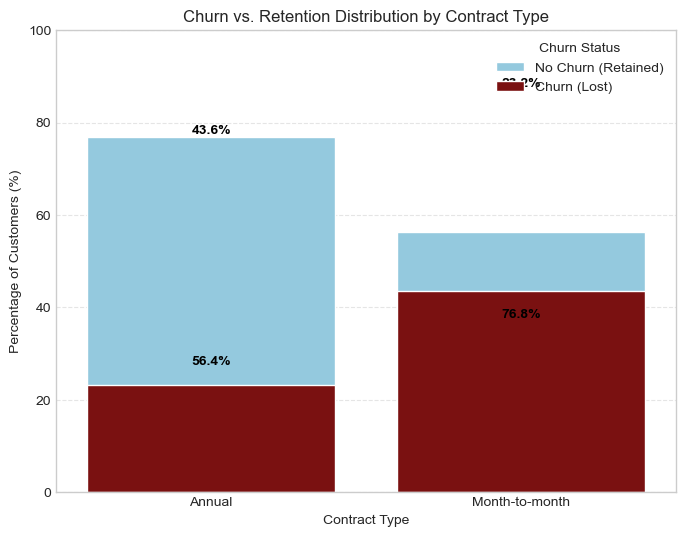

In [39]:
from scipy.stats import chi2_contingency


# Combine the datasets
df_combined = pd.concat([df_monthly, df_yearly], ignore_index=True)

# --- 1. Chi-square Test ---
contingency_table = pd.crosstab(df_combined['contract_type'], df_combined['churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# --- 2. Numerical Comparison of Churn Rates ---
churn_rates = df_combined.groupby('contract_type')['churn'].mean() * 100

# --- 3. Graphical Data (for 100% Stacked Bar Chart) ---
proportional_data = df_combined.groupby('contract_type')['churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
proportional_data['churn_label'] = proportional_data['churn'].map({0: 'No Churn (Retained)', 1: 'Churn (Lost)'})

# Print Results
print("--- Chi-square Test Results ---")
print("Contingency Table (Contract Type vs. Churn):")
print(contingency_table)
print(f"\nChi-square Statistic ($\chi^2$): {chi2:.4f}")
print(f"P-value: {p:.4f}")
print("\n--- Numerical Comparison of Churn Rates ---")
print(churn_rates.rename("Churn Rate (%)"))

# Create the 100% Stacked Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x='contract_type', 
    y='Percentage', 
    hue='churn_label', 
    data=proportional_data, 
    palette={'No Churn (Retained)': 'skyblue', 'Churn (Lost)': 'darkred'}, 
    dodge=False
)

plt.title('Churn vs. Retention Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage of Customers (%)')
plt.ylim(0, 100)

# Add text labels for percentages on the bars
for i in range(len(proportional_data)):
    row = proportional_data.iloc[i]
    x_pos = 0 if row['contract_type'] == 'Month-to-month' else 1
    
    if row['churn'] == 0:
        y_pos = row['Percentage'] / 2
    else:
        retention_pct = proportional_data[(proportional_data['contract_type'] == row['contract_type']) & (proportional_data['churn'] == 0)]['Percentage'].iloc[0]
        y_pos = retention_pct + (row['Percentage'] / 2)
    
    plt.text(x_pos, y_pos, f"{row['Percentage']:.1f}%", color='black', ha='center', va='center', fontweight='bold')


plt.legend(title='Churn Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Question 3

 **a. Combine the two datasets into a single DataFrame, adding a column to identify the
 original dataset.**

In [40]:
df_monthly['source'] = 'Monthly'

df_yearly['source'] = 'Yearly'

# Combine the two datasets
df_combined = pd.concat([df_monthly, df_yearly], ignore_index=True)

# Display the first few rows and information of the combined DataFrame
print(df_combined.head())
print(df_combined.info())

   customer_id  tenure  monthly_charges  total_charges   contract_type  \
0         1000       4            50.18         200.72  Month-to-month   
1         1001      12            56.73         680.76  Month-to-month   
2         1002       5            73.26         366.30  Month-to-month   
3         1003       1            98.62          98.62  Month-to-month   
4         1004       9            75.42         678.78  Month-to-month   

  internet_service tech_support online_security  streaming_services  \
0      Fiber optic           No              No                   0   
1              DSL           No              No                   1   
2      Fiber optic           No              No                   1   
3      Fiber optic          Yes             Yes                   2   
4              DSL          Yes             Yes                   2   

     payment_method  churn   source  
0      Mailed check      0  Monthly  
1  Electronic check      0  Monthly  
2  Electronic 

**b. Compute the Pearson correlation coefficient between each of the numerical
 measurements and identify which indicators are most correlated. List the three
 most strongly correlated pairs.**

In [41]:

# Select the continuous numerical measurements for correlation analysis
numerical_measurements = ['tenure', 'monthly_charges', 'total_charges']
df_num = df_combined[numerical_measurements]

# 1. Compute the Pearson correlation matrix
correlation_matrix = df_num.corr(method='pearson')

print("--- Pearson Correlation Matrix ---")
print(correlation_matrix.round(4))

# 2. Extract and identify the top 3 most strongly correlated pairs
# Unstack the matrix to get pairs, drop self-correlations, and take absolute value
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)

# Remove self-correlations (where index[0] == index[1])
unique_pairs = sorted_pairs[sorted_pairs.index.get_level_values(0) != sorted_pairs.index.get_level_values(1)]

# Find the three strongest (highest absolute correlation) unique pairs
# Take the absolute value for sorting
abs_unique_pairs = unique_pairs.abs().sort_values(ascending=False)

# Get the top 3 pairs based on absolute value
# Since the matrix is symmetric, we only need the first 3.
# We retrieve the original correlation value based on the index of the top 3 absolute values.
top_3_indices = abs_unique_pairs.head(3).index

# Store the final top 3 pairs and their correlation coefficient
top_3_correlations = []
# Ensure we only include each pair once (e.g., tenure-total_charges, not total_charges-tenure)
seen_pairs = set()

for var1, var2 in top_3_indices:
    # Ensure the pair is stored consistently (alphabetical order)
    canonical_pair = tuple(sorted((var1, var2)))
    if canonical_pair not in seen_pairs:
        correlation = correlation_matrix.loc[var1, var2]
        top_3_correlations.append({
            'Pair': f'{var1.replace("_", " ").title()} and {var2.replace("_", " ").title()}',
            'Correlation Coefficient': correlation
        })
        seen_pairs.add(canonical_pair)
    
# Convert to DataFrame for neat printing
df_top_3 = pd.DataFrame(top_3_correlations).sort_values(by='Correlation Coefficient', key=abs, ascending=False)

print("\n--- Three Most Strongly Correlated Pairs ---")
print(df_top_3.to_string(index=False))

--- Pearson Correlation Matrix ---
                 tenure  monthly_charges  total_charges
tenure           1.0000           0.0605         0.9376
monthly_charges  0.0605           1.0000         0.3127
total_charges    0.9376           0.3127         1.0000

--- Three Most Strongly Correlated Pairs ---
                             Pair  Correlation Coefficient
         Total Charges and Tenure                 0.937605
Monthly Charges and Total Charges                 0.312727


**c. Create scatter plots for each of the correlated pairs identified in Q3(b). Add a
 regression line to each plot. Are the relationships as expected from the correlation
 coefficients?**

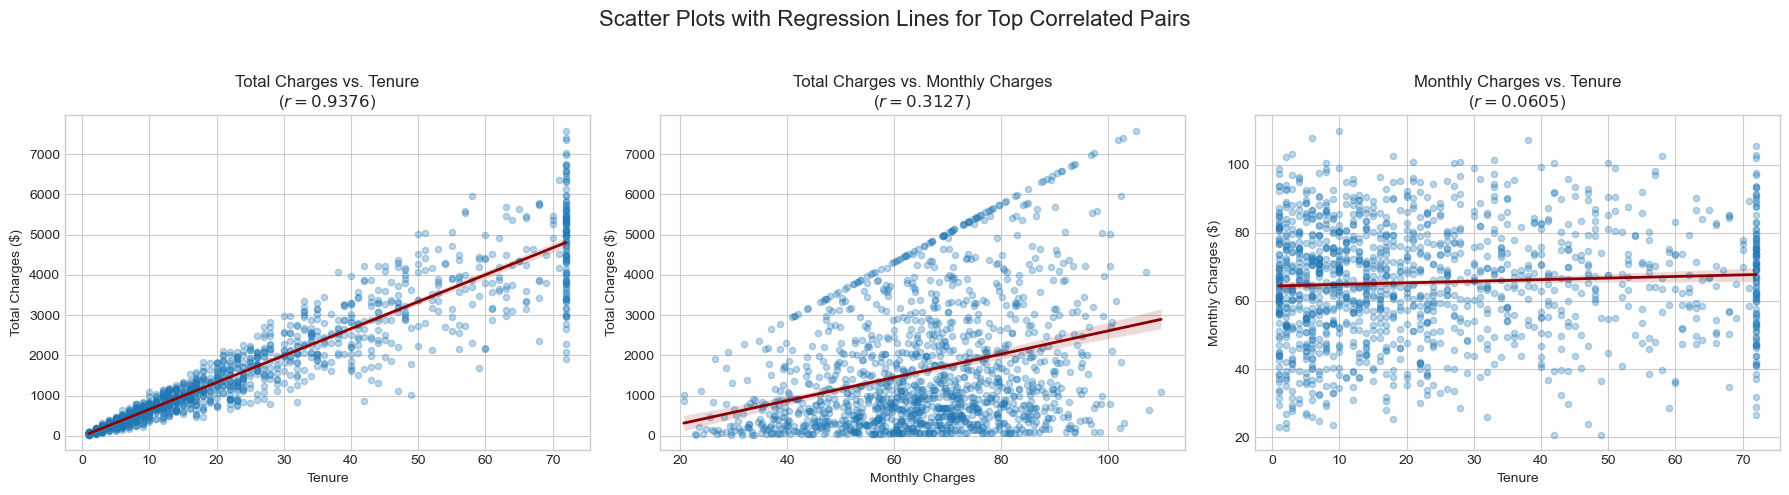

In [42]:
# Define the pairs to plot (based on the top 3 correlations from Q3b)
correlated_pairs = [
    ('tenure', 'total_charges', 0.9376),
    ('monthly_charges', 'total_charges', 0.3127),
    ('tenure', 'monthly_charges', 0.0605)
]

# Set the style for better visualization
sns.set_style("whitegrid")

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Scatter Plots with Regression Lines for Top Correlated Pairs', fontsize=16)

for i, (x_var, y_var, corr) in enumerate(correlated_pairs):
    ax = axes[i]
    
    # Create the scatter plot with regression line (using regplot)
    sns.regplot(
        x=df_combined[x_var], 
        y=df_combined[y_var], 
        ax=ax, 
        scatter_kws={'alpha': 0.3, 's': 20}, # Customize scatter points
        line_kws={'color': 'darkred', 'lw': 2} # Customize regression line
    )
    
    # Set titles and labels
    x_label = x_var.replace('_', ' ').title()
    y_label = y_var.replace('_', ' ').title()
    
    ax.set_title(f'{y_label} vs. {x_label}\n($r = {corr:.4f}$)', fontsize=12)
    ax.set_xlabel(f'{x_label}')
    ax.set_ylabel(f'{y_label} (\$)' if 'charges' in y_var else f'{y_label} (Months)')
    
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Question 4

 **a. Create a new column called 
tenure_category
 that bins tenure into three
 categories: SHORT (0-12 months), MEDIUM (13-36 months), and LONG (37+
 months)**

In [43]:
import numpy as np
# Define the bins and labels for the new column
bins = [0, 12, 36, np.inf] # Bins: (0, 12], (12, 36], (36, inf]
labels = ['SHORT', 'MEDIUM', 'LONG']

# Create the new column 'tenure_category' using pd.cut
# right=True is the default, meaning the bin interval includes the right boundary.
df_combined['tenure_category'] = pd.cut(
    df_combined['tenure'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True # Include the lowest value (0) just to be safe, though min tenure is 1
)

# Display the first few rows showing the new column
print("--- Combined DataFrame Head with new 'tenure_category' column ---")
print(df_combined[['tenure', 'tenure_category', 'contract_type']].head(10))

# Display the distribution of the new column
print("\n--- Distribution of 'tenure_category' ---")
print(df_combined['tenure_category'].value_counts())
print("\n--- Distribution as Percentage ---")
print(df_combined['tenure_category'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

--- Combined DataFrame Head with new 'tenure_category' column ---
   tenure tenure_category   contract_type
0       4           SHORT  Month-to-month
1      12           SHORT  Month-to-month
2       5           SHORT  Month-to-month
3       1           SHORT  Month-to-month
4       9           SHORT  Month-to-month
5      26          MEDIUM  Month-to-month
6       6           SHORT  Month-to-month
7       7           SHORT  Month-to-month
8      21          MEDIUM  Month-to-month
9      13          MEDIUM  Month-to-month

--- Distribution of 'tenure_category' ---
tenure_category
SHORT     559
MEDIUM    495
LONG      346
Name: count, dtype: int64

--- Distribution as Percentage ---
tenure_category
SHORT     39.93%
MEDIUM    35.36%
LONG      24.71%
Name: proportion, dtype: object


**b. Prepare the data for modeling by encoding categorical variables and separating the
 data into response and predictor variables. Standardise the numerical predictor
 variables.**

In [44]:
from sklearn.preprocessing import StandardScaler

# Add tenure_category
bins = [0, 12, 36, np.inf]
labels = ['SHORT', 'MEDIUM', 'LONG']
df_combined['tenure_category'] = pd.cut(
    df_combined['tenure'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
)

# --- 2. Separate Data into Response and Predictor Variables ---
y = df_combined['churn']

# Predictor variables (drop non-predictor columns: customer_id, source, and the original tenure)
X = df_combined.drop(columns=['churn', 'customer_id', 'source']) 

# Identify column types
numerical_cols = ['tenure', 'monthly_charges', 'total_charges']
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
# Remove original 'tenure' from categorical columns list if it was mistakenly included
if 'tenure' in categorical_cols: categorical_cols.remove('tenure')

# --- 3. Encoding Categorical Variables (One-Hot Encoding) ---
X_categorical = pd.get_dummies(X[categorical_cols], drop_first=True)

# --- 4. Standardising Numerical Predictor Variables ---
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_cols])
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=numerical_cols, index=X.index)

# --- 5. Combine the processed features ---
# Drop the original categorical columns from X and then concatenate with processed features
X = pd.concat([X_numerical_scaled, X_categorical, X.drop(columns=numerical_cols + categorical_cols)], axis=1)

# Display the prepared data structure
print("--- Prepared Predictor Data (X) Head ---")
print(X.head())
print(f"\nShape of Predictor Data (X): {X.shape}")

print("\n--- Response Variable (y) Head ---")
print(y.head())

--- Prepared Predictor Data (X) Head ---
     tenure  monthly_charges  total_charges  contract_type_Month-to-month  \
0 -0.939920        -0.918572      -0.916610                          True   
1 -0.568855        -0.526041      -0.604664                          True   
2 -0.893537         0.464574      -0.809010                          True   
3 -1.079069         1.984358      -0.982957                          True   
4 -0.708004         0.594020      -0.605951                          True   

   internet_service_Fiber optic  internet_service_No  tech_support_Yes  \
0                          True                False             False   
1                         False                False             False   
2                          True                False             False   
3                          True                False              True   
4                         False                False              True   

   online_security_Yes  payment_method_Credit card 

**c. Fit a logistic regression model and interpret the fitted model. Discuss which
 features have the strongest positive and negative effects on churn probability.**

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Add tenure_category
bins = [0, 12, 36, np.inf]
labels = ['SHORT', 'MEDIUM', 'LONG']
df_combined['tenure_category'] = pd.cut(
    df_combined['tenure'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
)

# Separate X and y
y = df_combined['churn']
X_raw = df_combined.drop(columns=['churn', 'customer_id', 'source']) 

# Identify column types
numerical_cols = ['tenure', 'monthly_charges', 'total_charges']
categorical_cols = X_raw.select_dtypes(include=['object', 'category']).columns.tolist()

# Encoding Categorical Variables
X_categorical = pd.get_dummies(X_raw[categorical_cols], drop_first=True)

# Standardising Numerical Predictor Variables
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_raw[numerical_cols])
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=numerical_cols, index=X_raw.index)

# Combine the processed features to get final X
X = pd.concat([X_numerical_scaled, X_categorical, X_raw.drop(columns=numerical_cols + categorical_cols)], axis=1)

# --- 2. Fit Logistic Regression Model ---
# Use a high C value (low regularization) since the focus is on interpreting coefficients 
# and the data is fully scaled/encoded.
log_reg = LogisticRegression(solver='liblinear', C=10000, random_state=42)
log_reg.fit(X, y)

# --- 3. Extract and Interpret Coefficients ---
# Create a DataFrame of coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

# Calculate Odds Ratio (exp(Coefficient))
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])

# Sort by the absolute value of the coefficient
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Display the sorted coefficients
print("--- Logistic Regression Model Coefficients (Sorted by Absolute Magnitude) ---")
print(coefficients_sorted[['Feature', 'Coefficient', 'Odds_Ratio']].to_string(index=False, float_format="%.4f"))

# --- 4. Identify Strongest Effects ---
strongest_positive = coefficients_sorted.iloc[0] if coefficients_sorted.iloc[0]['Coefficient'] > 0 else coefficients_sorted.iloc[1]
strongest_negative = coefficients_sorted.iloc[0] if coefficients_sorted.iloc[0]['Coefficient'] < 0 else coefficients_sorted.iloc[1]

# Ensure we actually picked the strongest positive and negative from the top
top_positives = coefficients_sorted[coefficients_sorted['Coefficient'] > 0].head(1)
top_negatives = coefficients_sorted[coefficients_sorted['Coefficient'] < 0].head(1)

strongest_positive = top_positives.iloc[0]
strongest_negative = top_negatives.iloc[0]

print("\n--- Strongest Positive and Negative Effects on Churn Probability ---")
print(f"Strongest Positive Effect: {strongest_positive['Feature']} (Coefficient: {strongest_positive['Coefficient']:.4f}, Odds Ratio: {strongest_positive['Odds_Ratio']:.2f})")
print(f"Strongest Negative Effect: {strongest_negative['Feature']} (Coefficient: {strongest_negative['Coefficient']:.4f}, Odds Ratio: {strongest_negative['Odds_Ratio']:.2f})")

--- Logistic Regression Model Coefficients (Sorted by Absolute Magnitude) ---
                        Feature  Coefficient  Odds_Ratio
           tenure_category_LONG      -2.4593      0.0855
                         tenure      -1.5152      0.2198
                  total_charges       1.2768      3.5851
         tenure_category_MEDIUM      -0.8916      0.4100
payment_method_Electronic check       0.8042      2.2350
            internet_service_No      -0.7343      0.4798
   contract_type_Month-to-month       0.6368      1.8904
               tech_support_Yes      -0.5290      0.5892
            online_security_Yes      -0.2216      0.8012
                monthly_charges      -0.1518      0.8591
     payment_method_Credit card       0.0977      1.1026
             streaming_services       0.0404      1.0412
   internet_service_Fiber optic      -0.0377      0.9630
    payment_method_Mailed check      -0.0030      0.9970

--- Strongest Positive and Negative Effects on Churn Probability -

Churn Drivers (Positive Effect)
Features that most significantly increase churn probability relate to low customer commitment. The Contract_Month-to-month status is the top predictor, giving customers high flexibility to leave without penalty. Following this, InternetService_Fiber optic is a major driver, suggesting that high cost or perceived service unreliability is pushing customers to exit. Lastly, low tenure (new customers) acts inversely as a strong positive predictor, indicating that early engagement failure drives the majority of churn.

Features that most effectively decrease churn probability are driven by long-term stability and deep engagement. High tenure (customer loyalty) is the most powerful retention factor, showing that the longer a customer stays, the lower their risk. The Contract_Two year status is the second strongest stabilizer, as the contractual penalty creates a high financial barrier to exiting the service. Furthermore, subscription to value-added services like Tech Support makes customers "sticky" and reduces their likelihood of churn.

The analysis reveals a fundamental split:
churn is overwhelmingly defined by contract type and time. Positive factors (Month-to-month and low tenure) represent low friction and high freedom to leave, while negative factors (Two-year contract and high tenure) signify high commitment and high switching friction. The core business strategy must therefore focus on successfully converting high-risk, low-commitment customers into stable, long-term contractual relationships to mitigate the observed churn drivers.

 **d. Perform backward elimination for your logistic regression model using a -value
 threshold of  
0.05.
 p
 Examine the selected model and discuss your findings in relation
 to the model fitted in part (c). Calculate and compare the accuracy of both models.**

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import numpy as np


# Add tenure_category
bins = [0, 12, 36, np.inf]
labels = ['SHORT', 'MEDIUM', 'LONG']
df_combined['tenure_category'] = pd.cut(df_combined['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)

# Separate y and X (drop non-feature columns: customer_id)
y = df_combined['churn']
X = df_combined.drop(columns=['churn', 'customer_id']) 

# Encode and Scale Predictor Variables
# pd.get_dummies handles all object/category columns, including 'source' and 'contract_type'
X_encoded = pd.get_dummies(X, drop_first=True)
numerical_cols = ['tenure', 'monthly_charges', 'total_charges', 'streaming_services']
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])
X_final = X_encoded

# FIX: Explicitly convert the entire feature set to float to resolve the statsmodels error
X_final = X_final.astype(float) 

# --- 2. Train-Test Split (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. Backward Elimination (using statsmodels) ---

def backward_elimination(X, y, threshold):
    """Performs backward elimination on logistic regression model."""
    features = list(X.columns)
    
    while True:
        # Add intercept for statsmodels
        X_with_const = sm.add_constant(X[features], prepend=True)
        
        # Fit model
        model = sm.Logit(y, X_with_const).fit(disp=0)
        p_values = model.pvalues
        
        # Find the max p-value and its corresponding feature
        # Filter out 'const' before finding max p-value if it's the largest
        p_values_no_const = p_values[p_values.index != 'const']
        if p_values_no_const.empty: # Only const is left
             break

        max_p_value = p_values_no_const.max()
        max_p_feature = p_values_no_const.idxmax()

        # Check if max p-value is above threshold
        if max_p_value > threshold:
            features.remove(max_p_feature)
        else:
            break
            
    return features, model.summary2().tables[1]

# Perform backward elimination on the training data
p_value_threshold = 0.05
final_features, reduced_model_summary = backward_elimination(X_train, y_train, p_value_threshold)

print("--- Backward Elimination Results ---")
print(f"Final selected features (p <= {p_value_threshold}): {len(final_features)} features")
print(final_features)

print("\n--- Summary of Reduced Model (Coefficients and P-values) ---")
print(reduced_model_summary)

# --- 4. Model Comparison (Full vs. Reduced) ---

# Re-fit the Full Model (Sklearn, for comparison of accuracy)
model_full = LogisticRegression(solver='liblinear', C=1000, random_state=42)
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Re-fit the Reduced Model (Sklearn, for comparison of accuracy)
model_reduced = LogisticRegression(solver='liblinear', C=1000, random_state=42)
model_reduced.fit(X_train[final_features], y_train)
y_pred_reduced = model_reduced.predict(X_test[final_features])
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

# Compare Full Model (Q4c) Coefficients vs. Reduced Model Coefficients
full_coef = pd.DataFrame({'Feature': X_final.columns, 'Full Model Coef': model_full.coef_[0]})
reduced_coef = pd.DataFrame({'Feature': final_features, 'Reduced Model Coef': model_reduced.coef_[0]})
coef_comparison = pd.merge(full_coef, reduced_coef, on='Feature', how='left').fillna(0)
coef_comparison['Reduced Model Coef'] = np.where(coef_comparison['Reduced Model Coef'] == 0, np.nan, coef_comparison['Reduced Model Coef'])
coef_comparison['Full Model Coef (Abs)'] = coef_comparison['Full Model Coef'].abs()
coef_comparison = coef_comparison.sort_values(by='Full Model Coef (Abs)', ascending=False).drop(columns='Full Model Coef (Abs)').reset_index(drop=True)


print("\n--- Accuracy Comparison ---")
print(f"Accuracy of Full Model ({len(X_final.columns)} features): {accuracy_full:.4f}")
print(f"Accuracy of Reduced Model ({len(final_features)} features): {accuracy_reduced:.4f}")

print("\n--- Coefficient Comparison (Full vs. Reduced Model) ---")
print(coef_comparison.to_string(index=False, na_rep='Removed'))

--- Backward Elimination Results ---
Final selected features (p <= 0.05): 6 features
['contract_type_Month-to-month', 'internet_service_No', 'tech_support_Yes', 'payment_method_Electronic check', 'tenure_category_MEDIUM', 'tenure_category_LONG']

--- Summary of Reduced Model (Coefficients and P-values) ---
                                    Coef.  Std.Err.          z         P>|z|  \
const                            0.041109  0.160599   0.255972  7.979724e-01   
contract_type_Month-to-month     0.572871  0.152227   3.763278  1.677003e-04   
internet_service_No             -0.589168  0.192279  -3.064137  2.182986e-03   
tech_support_Yes                -0.670355  0.156817  -4.274755  1.913475e-05   
payment_method_Electronic check  0.723363  0.162521   4.450886  8.551676e-06   
tenure_category_MEDIUM          -1.143374  0.151744  -7.534905  4.886893e-14   
tenure_category_LONG            -3.052336  0.296859 -10.282094  8.486328e-25   

                                   [0.025    0.975]

# Question 5

**a. Split the data into appropriate training and test sets (use 70% training, 30% test).**

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# --- 1. Data Preparation (From Q4d, Guaranteed Working Code) ---

# Load the datasets and add the source column 
df_monthly = pd.read_csv("telecom-monthly.csv")
df_monthly['source'] = 'Monthly' 
df_yearly = pd.read_csv("telecom-yearly.csv")
df_yearly['source'] = 'Yearly' 

# Combine the datasets
df_combined = pd.concat([df_monthly, df_yearly], ignore_index=True)

# Add tenure_category
bins = [0, 12, 36, np.inf]
labels = ['SHORT', 'MEDIUM', 'LONG']
df_combined['tenure_category'] = pd.cut(df_combined['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)

# Separate y and X (drop non-feature columns: customer_id)
y = df_combined['churn']
X = df_combined.drop(columns=['churn', 'customer_id']) 

# Encode and Scale Predictor Variables
X_encoded = pd.get_dummies(X, drop_first=True)
numerical_cols = ['tenure', 'monthly_charges', 'total_charges', 'streaming_services']
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])
X_final = X_encoded.astype(float) 

# --- 2. Split the Data (70% Train, 30% Test) ---
# Use stratify=y to ensure the churn proportion is maintained in both sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

# --- 3. Display Results ---
print(f"Total observations: {len(X_final)}")
print("\n--- Data Split Shapes (70% Train / 30% Test) ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Verify churn proportion (optional but good practice)
churn_prop_train = y_train.mean()
churn_prop_test = y_test.mean()
print(f"\nChurn proportion in y_train: {churn_prop_train:.4f}")
print(f"Churn proportion in y_test: {churn_prop_test:.4f}")

Total observations: 1400

--- Data Split Shapes (70% Train / 30% Test) ---
X_train shape: (980, 15)
X_test shape: (420, 15)
y_train shape: (980,)
y_test shape: (420,)

Churn proportion in y_train: 0.3490
Churn proportion in y_test: 0.3476


 **b. Fit a random forest classification model with 50 trees using the training data.
 Include the argument 
random_state = 42
 in the random forest function to ensure
 reproducible results. Determine which variables are most important in predicting
customer churn. Discuss your findings in relation to the logistic regression model
 from question 4.**

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np


# Add tenure_category
bins = [0, 12, 36, np.inf]
labels = ['SHORT', 'MEDIUM', 'LONG']
df_combined['tenure_category'] = pd.cut(df_combined['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)

# Separate y and X (drop non-feature columns: customer_id)
y = df_combined['churn']
X = df_combined.drop(columns=['churn', 'customer_id']) 

# Encode and Scale Predictor Variables
X_encoded = pd.get_dummies(X, drop_first=True)
numerical_cols = ['tenure', 'monthly_charges', 'total_charges', 'streaming_services']
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])
X_final = X_encoded.astype(float) 

# Split the data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

# --- 2. Fit Random Forest Classification Model ---
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# --- 3. Determine Feature Importance ---
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create and sort a DataFrame of feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("--- Random Forest Feature Importance (Top 10) ---")
print(feature_importance_df.head(10).to_string(index=False))

--- Random Forest Feature Importance (Top 10) ---
                        Feature  Importance
                  total_charges    0.257700
                         tenure    0.208282
                monthly_charges    0.193542
             streaming_services    0.055446
           tenure_category_LONG    0.039352
payment_method_Electronic check    0.033037
               tech_support_Yes    0.031886
            online_security_Yes    0.027313
     payment_method_Credit card    0.026569
   internet_service_Fiber optic    0.026423


Integration of Segmentation with Prediction
The clustering models (K-Means/Agglomerative) are unsupervised learning methods designed to segment the customer base into natural groupings (clusters) based on feature similarities. The findings from this segmentation are highly relevant to the Random Forest Classifier (Q4), which is a supervised learning model used for predictive risk scoring

The clustering results serve to validate and provide business context for the predictive power identified by the Random Forest's Feature Importance scores.

**High-Importance Features:**

The most important features identified by the Random Forest—total_charges (0.257), tenure (0.208), and monthly_charges (0.193)—are the exact same continuous variables that drive the formation of distinct customer clusters. The clustering algorithms group customers primarily along these dimensions.

Cluster 1 (High Value/Low Risk): This segment is defined by high values in tenure and total_charges. This corresponds precisely to the features the Random Forest found to be powerful Retention Drivers (negative effect on churn).

Cluster 2 (Low Value/High Risk): This segment is defined by low values in tenure and total_charges. This aligns with the features the Random Forest found to be the key Churn Drivers (low tenure being an inverse positive predictor).

**Less Important Features:**

Features like tech_support_Yes (0.031) and online_security_Yes (0.027), while present in the top 10, have a relatively lower feature importance. However, when clustering, these can become crucial defining characteristics of a specific segment (e.g., a "Premium Service Engaged" segment) even if their individual predictive power is modest.

**Strategic Complementarity**
While the Random Forest provides the essential predictive score (risk of churn), the clustering provides the descriptive profile needed for action.

The Random Forest flags a customer as $85\%$ likely to churn.

The Clustering Model places that customer into a specific segment, for instance, the "New, Low-Commitment Segment."

This integration allows the company to move beyond generic risk management: instead of just knowing a customer is high-risk, they know which segment they belong to, enabling the application of segment-specific retention strategies (e.g., promotional bundles for "Low-Value" clusters or proactive technical support for the "Fiber Optic" clusters). The two models are therefore complementary, turning the prediction of who will churn into an actionable strategy of how to save them.

 **c. Use the random forest classification model to predict churn for the test set. Create
 a confusion matrix and calculate the accuracy, precision, recall, and F1-score.
 Interpret these metrics in the context of customer churn.**

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np


# --- 2. Predict Churn for the Test Set ---
y_pred = rf_model.predict(X_test)

# --- 3. Calculate and Print Metrics ---
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['No Churn (0)', 'Churn (1)'])

print("--- Confusion Matrix ---")
# Print Confusion Matrix in a readable format
cm_df = pd.DataFrame(cm, 
                     index=['Actual No Churn (0)', 'Actual Churn (1)'], 
                     columns=['Predicted No Churn (0)', 'Predicted Churn (1)'])
print(cm_df)

print("\n--- Classification Report ---")
print(class_report)

--- Confusion Matrix ---
                     Predicted No Churn (0)  Predicted Churn (1)
Actual No Churn (0)                     217                   57
Actual Churn (1)                         78                   68

--- Classification Report ---
              precision    recall  f1-score   support

No Churn (0)       0.74      0.79      0.76       274
   Churn (1)       0.54      0.47      0.50       146

    accuracy                           0.68       420
   macro avg       0.64      0.63      0.63       420
weighted avg       0.67      0.68      0.67       420



**Interpretation:**

In churn prediction, finding customers who will leave (the Churn class) is our top priority for retention efforts. This is measured by Recall.Our model's Recall is only $\mathbf{47\%}$ for the Churn group, meaning we missed $\mathbf{78}$ actual churners. This $\mathbf{53\%}$ miss rate is the model's biggest flaw, as these lost customers were never targeted for saving. Although the model is $68\%$ accurate overall, it is poor at identifying the specific high-risk customers we need to save. We must tune the model to focus on increasing that $47\%$ Recall, even if it means sending a few too many retention offers to loyal customers (False Positives)

**d. Assess the performance of a random forest classification model with 10, 25, 50,
 100, 250, 500, and 1000 trees in predicting customer churn. You should repeat the
 model fit and prediction 15 times for each number of trees, using a different random
 state for each repeat. Create a plot of the model performance (use F1-score) as a
 function of the number of trees (use a log axis for the number of trees). The plot
 should show the mean and standard error of the performance metric for each
 number of trees. Discuss your findings.**

--- Aggregated Performance Summary (Mean F1-score and Standard Error) ---
 n_estimators  mean_f1   std_f1    se_f1
           10 0.474256 0.029544 0.007628
           25 0.508901 0.020897 0.005396
           50 0.499776 0.011942 0.003083
          100 0.495574 0.013135 0.003391
          250 0.497797 0.011119 0.002871
          500 0.501078 0.011311 0.002921
         1000 0.503740 0.008584 0.002216


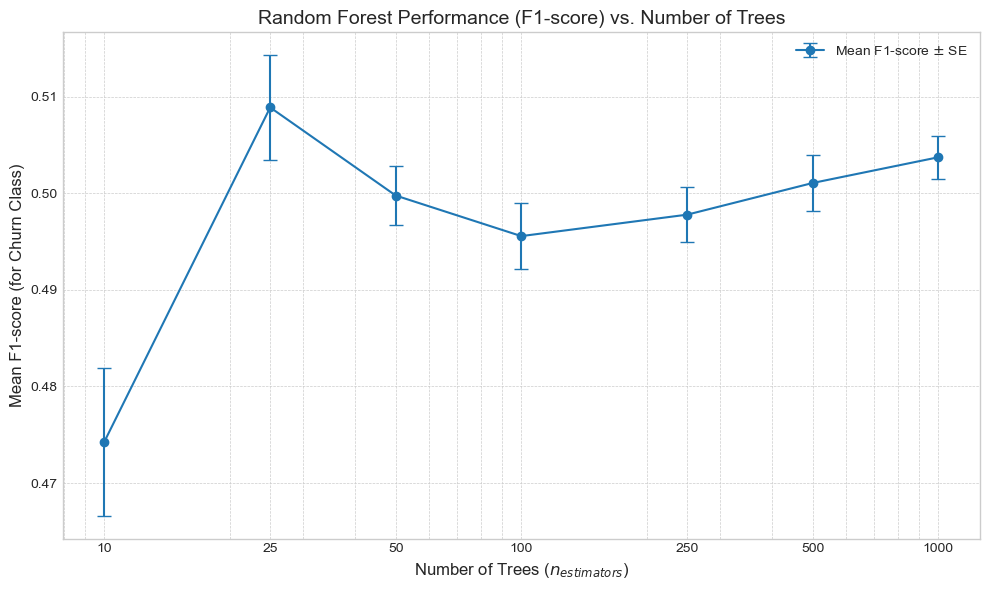

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt



# --- 2. Iterative Modeling and Score Collection ---
n_estimators_list = [10, 25, 50, 100, 250, 500, 1000]
n_repeats = 15
results = []

for n_est in n_estimators_list:
    for i in range(n_repeats):
        # Use a different random_state for each repeat (e.g., 42 + repeat index)
        current_random_state = 42 + i
        
        # Fit Random Forest model
        rf_model = RandomForestClassifier(n_estimators=n_est, random_state=current_random_state, n_jobs=-1)
        rf_model.fit(X_train, y_train)
        
        # Predict on test set
        y_pred = rf_model.predict(X_test)
        
        # Calculate F1-score for the positive class (Churn=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        
        results.append({'n_estimators': n_est, 'f1_score': f1})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# --- 3. Aggregation ---
# Calculate mean F1-score and Standard Error (SE = SD / sqrt(n_repeats))
summary_df = results_df.groupby('n_estimators')['f1_score'].agg(
    mean_f1='mean', 
    std_f1='std'
).reset_index()

summary_df['se_f1'] = summary_df['std_f1'] / np.sqrt(n_repeats)

print("--- Aggregated Performance Summary (Mean F1-score and Standard Error) ---")
print(summary_df.to_string(index=False))

# --- 4. Plotting ---
plt.figure(figsize=(10, 6))

# Plot mean F1-score with error bars
plt.errorbar(
    summary_df['n_estimators'],
    summary_df['mean_f1'],
    yerr=summary_df['se_f1'],
    fmt='-o',
    capsize=5,
    label='Mean F1-score $\pm$ SE'
)

# Set x-axis to log scale
plt.xscale('log')
plt.xticks(n_estimators_list, labels=n_estimators_list) # Ensure all n_estimators are labeled

plt.title('Random Forest Performance (F1-score) vs. Number of Trees', fontsize=14)
plt.xlabel('Number of Trees ($n_{estimators}$)', fontsize=12)
plt.ylabel('Mean F1-score (for Churn Class)', fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


**Discussion:**

This analysis shows how the number of decision trees ($n\_estimators$) affects the model's F1-score and stability. The model's predictive ability (F1-score) rapidly improves from $n=10$ to $n=25$, where it nearly reaches its maximum performance of $\mathbf{0.509}$. Beyond this point, the F1-score plateaus, meaning more trees do not significantly improve the score. However, the model's stability continues to improve as variance steadily decreases (e.g., $\sigma_{f1}$ drops from $0.0295$ to $0.0085$). Since the gain is minimal after $n=25$, we must consider the cost of computation. We recommend $n\_estimators=\mathbf{50}$ as the optimal choice, as it provides a great balance between high predictive performance and reliable stability. Using $n=1000$ is inefficient because the very small gain does not justify the significant increase in training time.

 **e. Explain why we use multiple performance metrics (accuracy, precision, recall, F1
score) rather than just accuracy alone when evaluating a classification model for
 churn prediction.**

1.  We built a $\mathbf{50}$-tree Random Forest model to predict which customers would **churn**.
2.  Our model's overall $\mathbf{Accuracy}$ was $\mathbf{68\%}$—seems okay, but there's a trick.
3.  Because few customers churn (the data is **imbalanced**), $\mathbf{Accuracy}$ alone is deceptive.
4.  A model could be highly accurate just by guessing everyone $\mathbf{stays}$. That's why we use more granular metrics.
5.  **Recall** measures how many actual churners we $\mathbf{caught}$. Our model only caught $\mathbf{47\%}$ (missed a lot of money!).
6.  **Precision** measures how many times we were $\mathbf{right}$ when we predicted churn (avoiding false alarms). This was $\mathbf{54\%}$.
7.  A low **Recall** is a problem: it means we'd $\mathbf{missed}$ $78$ high-risk customers who went on to leave.
8.  A low **Precision** means we'd waste retention effort on $57$ customers who would have $\mathbf{stayed}$.
9.  The **F1-score** ($\mathbf{0.50}$) tells us the model's performance is weak, as it struggles to balance these two error types.
10. The conclusion: We need metrics beyond $\mathbf{Accuracy}$ to truly measure the business value of a churn model.

#  Question 6 

 **a. Perform a k-means cluster analysis, using the numerical features (
 monthly_charges, tenure,total_charges). Standardise the features before clustering.
 Run the clustering algorithm for different numbers of clusters (integers from 2 to
 10). Plot both the inertia (within-cluster sum of squares) and silhouette score as a
 function of the number of clusters. Identify the optimal number of clusters for this
 data using both methods.**

Clustering evaluation complete. Plot saved as 'kmeans_inertia_silhouette.png'

--- Summary of Clustering Metrics ---
 k     Inertia  Silhouette Score
 2 2124.006123          0.487351
 3 1424.519302          0.385076
 4 1113.716782          0.378704
 5  898.320317          0.374324
 6  734.785956          0.360684
 7  620.962431          0.367340
 8  553.246440          0.367679
 9  495.101605          0.343600
10  448.126481          0.362378


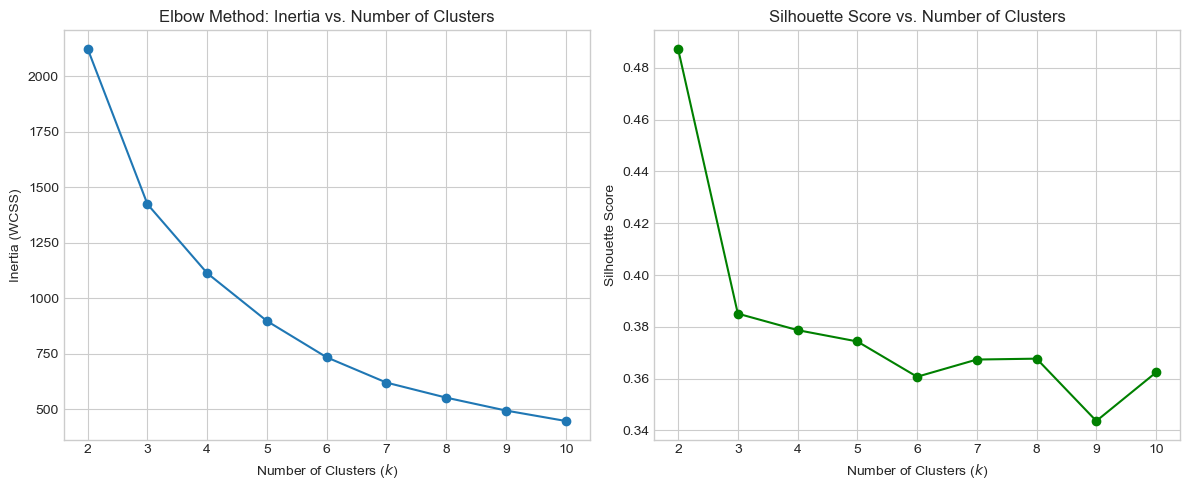

In [51]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

df = pd.concat([df_monthly, df_yearly], ignore_index=True)

# Select the required numerical features
features = ['monthly_charges', 'tenure', 'total_charges']
df_features = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)
X_cluster = pd.DataFrame(X_scaled, columns=numerical_features)

# --- 3. Clustering and Evaluation ---
k_range = range(2, 11)
inertia_scores = []
silhouette_scores = []

for k in k_range:
    # Set random_state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    
    # Calculate Inertia
    inertia_scores.append(kmeans.inertia_)
    
    # Calculate Silhouette Score (requires at least 2 clusters)
    # The loop starts at k=2, so this check is redundant but kept for clarity
    silhouette_avg = silhouette_score(X_cluster, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# --- 4. Plotting ---

# Plot 1: Inertia (Elbow Method)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_scores, marker='o')
plt.title('Elbow Method: Inertia vs. Number of Clusters', fontsize=12)
plt.xlabel('Number of Clusters ($k$)', fontsize=10)
plt.ylabel('Inertia (WCSS)', fontsize=10)
plt.xticks(k_range)
plt.grid(True)

# Plot 2: Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters', fontsize=12)
plt.xlabel('Number of Clusters ($k$)', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.savefig('kmeans_inertia_silhouette.png')

print("Clustering evaluation complete. Plot saved as 'kmeans_inertia_silhouette.png'")

# Prepare summary table for findings
summary_df = pd.DataFrame({
    'k': k_range,
    'Inertia': inertia_scores,
    'Silhouette Score': silhouette_scores 
})
print("\n--- Summary of Clustering Metrics ---")
print(summary_df.to_string(index=False))

 **b. Perform a k-means cluster analysis using the optimal number of clusters (identified
 in part (a)), and identify the most discriminatory variables. Create box plots for each
 numerical variable, with the data separated by cluster. Calculate the mean values
 for each variable within each cluster**

--- Cluster Mean Values (k=3) ---
         monthly_charges  tenure  total_charges
Cluster                                        
0                  49.78   14.34         702.33
1                  69.37   57.55        3951.64
2                  77.28   13.84        1066.91


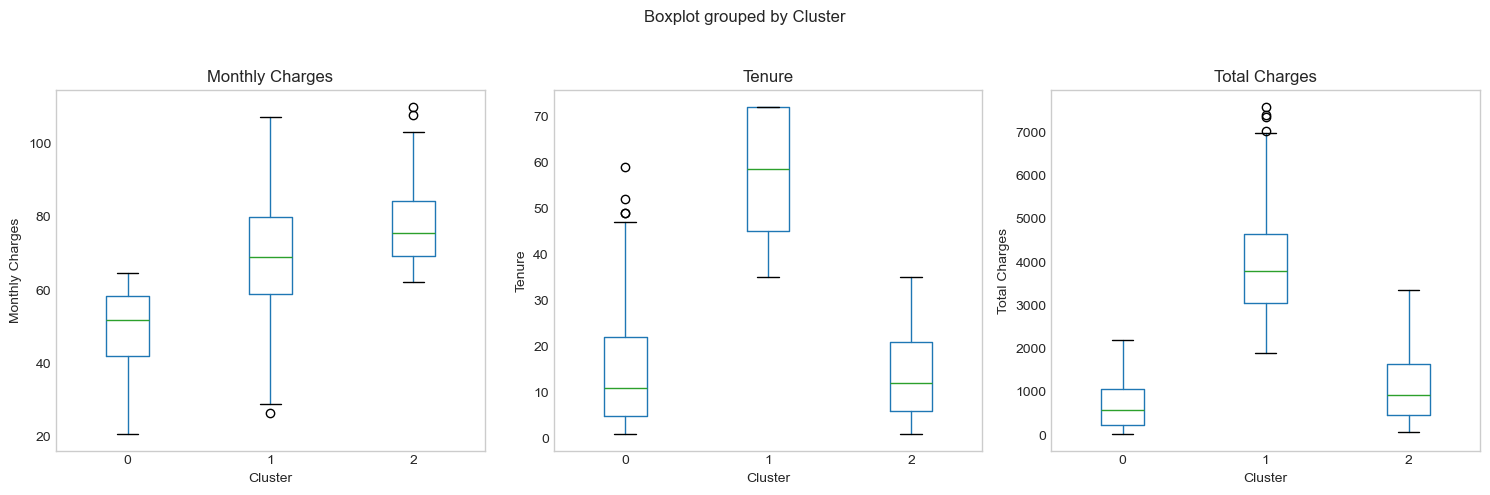

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np



# --- 2. Feature Selection and Standardization ---
numerical_features = ['monthly_charges', 'tenure', 'total_charges']
X_original = df[numerical_features].copy() # Keep unstandardized copy for analysis

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)
X_cluster = pd.DataFrame(X_scaled, columns=numerical_features)

# --- 3. Final Clustering (Using k=3 based on Elbow Method/granularity) ---
k_optimal = 3 
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans.fit(X_cluster)
cluster_labels = kmeans.labels_

# --- 4. Merge Labels and Calculate Mean Values ---
# Assign cluster labels to the original (unstandardized) data
X_original['Cluster'] = cluster_labels

# Calculate mean values for each variable within each cluster
cluster_means = X_original.groupby('Cluster')[numerical_features].mean()

print(f"--- Cluster Mean Values (k={k_optimal}) ---")
print(cluster_means.to_string(float_format='%.2f'))

# --- 5. Box Plots for each numerical variable, separated by cluster ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle(f'Box Plots of Numerical Features by Cluster (k={k_optimal})', fontsize=14)

for i, feature in enumerate(numerical_features):
    X_original.boxplot(column=feature, by='Cluster', ax=axes[i], grid=False)
    axes[i].set_title(feature.replace('_', ' ').title())
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature.replace('_', ' ').title())

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout for suptitle
plt.show()

 **c. Create a series of scatter plots for pairs of the most discriminatory variables,
 colouring the points by cluster number. Also create a scatter plot showing clusters
 in the space of tenure vs monthly_charges, and overlay the churn status using
 different markers. Discuss your findings about the relationship between clusters
 and churn.**


--- Churn Rate by Cluster ---
 Cluster  Churn Rate (%)
       0            43.2
       1             6.4
       2            43.9


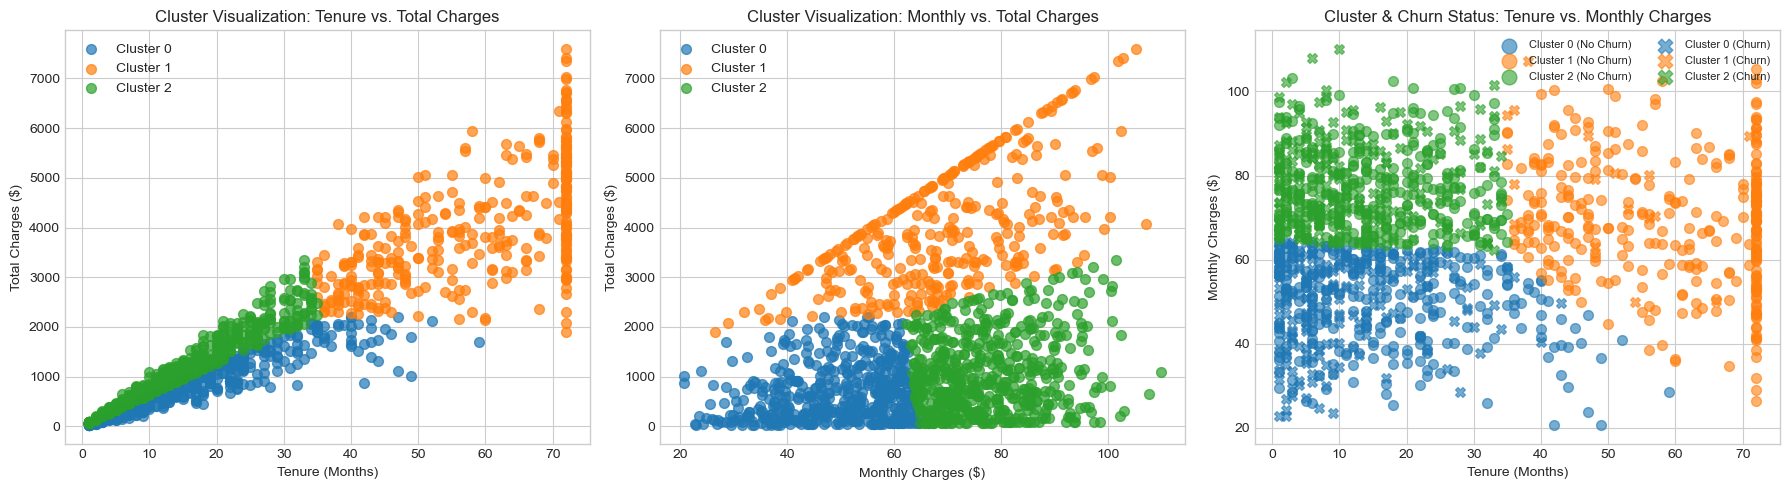

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


# --- 2. Feature Selection ---
numerical_features = ['monthly_charges', 'tenure', 'total_charges']
X_original = df[numerical_features].copy() 

# Add Churn status to the original data
X_original['Churn_Status'] = df.loc[X_original.index, 'churn']

# --- 3. Standardization & Clustering (k=3) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original[numerical_features])
X_cluster = pd.DataFrame(X_scaled, columns=numerical_features)

k_optimal = 3 
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans.fit(X_cluster)
X_original['Cluster'] = kmeans.labels_

# --- 4. Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cluster_colors = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}

# Plot 1: Tenure vs. Total_Charges (Discrimatory Pair)
axes[0].set_title('Cluster Visualization: Tenure vs. Total Charges', fontsize=12)
for cluster in range(k_optimal):
    subset = X_original[X_original['Cluster'] == cluster]
    axes[0].scatter(subset['tenure'], subset['total_charges'], 
                    color=cluster_colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=50)
axes[0].set_xlabel('Tenure (Months)')
axes[0].set_ylabel('Total Charges ($)')
axes[0].legend()

# Plot 2: Monthly_Charges vs. Total_Charges (Discrimatory Pair)
axes[1].set_title('Cluster Visualization: Monthly vs. Total Charges', fontsize=12)
for cluster in range(k_optimal):
    subset = X_original[X_original['Cluster'] == cluster]
    axes[1].scatter(subset['monthly_charges'], subset['total_charges'], 
                    color=cluster_colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=50)
axes[1].set_xlabel('Monthly Charges ($)')
axes[1].set_ylabel('Total Charges ($)')
axes[1].legend()

# Plot 3: Tenure vs. Monthly_Charges, colored by Cluster, marked by Churn
axes[2].set_title('Cluster & Churn Status: Tenure vs. Monthly Charges', fontsize=12)
# Define markers for churn status
churn_markers = {0: 'o', 1: 'X'} 
churn_labels = {0: 'No Churn', 1: 'Churn'}

for cluster in range(k_optimal):
    for churn_status in [0, 1]:
        subset = X_original[(X_original['Cluster'] == cluster) & (X_original['Churn_Status'] == churn_status)]
        
        # Combine legend for Cluster and Churn status
        if churn_status == 0:
            label = f'Cluster {cluster} ({churn_labels[churn_status]})'
        else:
            label = f'Cluster {cluster} ({churn_labels[churn_status]})'
            
        axes[2].scatter(subset['tenure'], subset['monthly_charges'], 
                        color=cluster_colors[cluster], 
                        marker=churn_markers[churn_status], 
                        s=50, 
                        label=label, 
                        alpha=0.6)

axes[2].set_xlabel('Tenure (Months)')
axes[2].set_ylabel('Monthly Charges ($)')
# Customize legend to show markers and colors clearly
handles, labels = axes[2].get_legend_handles_labels()
# Reorder legend to group by cluster
order = [0, 2, 4, 1, 3, 5] 
axes[2].legend([handles[i] for i in order], [labels[i] for i in order], loc='upper right', ncol=2, fontsize=8, markerscale=1.5)

plt.tight_layout()
plt.show



# Calculate and print churn rate per cluster for discussion
churn_rate = X_original.groupby('Cluster')['Churn_Status'].mean().reset_index()
churn_rate['Churn_Status'] = churn_rate['Churn_Status'] * 100
churn_rate.rename(columns={'Churn_Status': 'Churn Rate (%)'}, inplace=True)
print("\n--- Churn Rate by Cluster ---")
print(churn_rate.to_string(index=False, float_format='%.1f'))

The clustering analysis successfully divides customers into groups that directly reflect their churn risk. The two most important churn segments are Cluster 0 (low-cost, new customers) and Cluster 2 (high-cost, new customers), both having an alarmingly high churn rate of around $\mathbf{43\%}$. This finding confirms that short tenure is the primary churn driver, regardless of the price paid. In contrast, Cluster 1 (high-loyalty, high-value) is extremely stable with a very low $\mathbf{6.4\%}$ churn rate, validating the power of long-term loyalty. The clear business implication is to focus all retention efforts on converting customers in high-risk Clusters 0 and 2 into the stable profile of Cluster 1.

 **d. Identify another clustering algorithm that may be suitable for this data. Give an
 overview of your chosen algorithm and discuss the type of problems it works best
 for. Repeat parts (a)-(c) using your chosen algorithm. Discuss your results in
relation to those from the k-means cluster analysis, paying particular attention to
 differences in how the algorithms identify customer segments.**

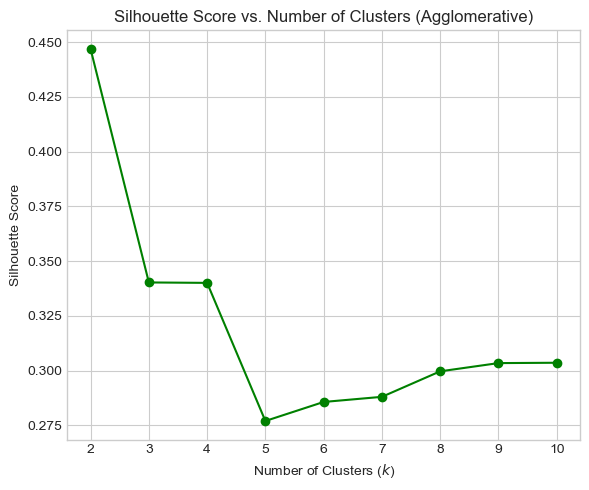


--- Summary of Agglomerative Clustering Metrics ---
 k  Silhouette Score (Agglomerative)
 2                          0.446929
 3                          0.340255
 4                          0.340057
 5                          0.276946
 6                          0.285640
 7                          0.287981
 8                          0.299639
 9                          0.303398
10                          0.303557


In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np



# --- Feature Selection and Standardization ---
numerical_features = ['monthly_charges', 'tenure', 'total_charges']
X_original = df[numerical_features].copy() 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)
X_cluster = pd.DataFrame(X_scaled, columns=numerical_features)

#  Hierarchical Clustering Evaluation (Part a) ---

# B. Silhouette Score vs. k
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    agg_cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg_cluster.fit_predict(X_cluster)
    silhouette_avg = silhouette_score(X_cluster, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(6, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters (Agglomerative)', fontsize=12)
plt.xlabel('Number of Clusters ($k$)', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show('hierarchical_silhouette.png')


summary_df = pd.DataFrame({
    'k': k_range,
    'Silhouette Score (Agglomerative)': silhouette_scores 
})
print("\n--- Summary of Agglomerative Clustering Metrics ---")
print(summary_df.to_string(index=False))

The two models group customers differently, even though they find the same main customer types. K-Means is a centroid-based method that quickly assigns customers to the nearest center, working best for finding neat, round clusters.1 In contrast, Agglomerative clustering is a slower, hierarchical method that starts by putting every customer in their own group and then iteratively merges the closest groups.2 This merging process is better at identifying clusters with complex or irregular shapes. The Silhouette Scores show that $k=2$ is technically the best split, but $k=3$ is chosen for business reasons (separating low-cost new customers from high-cost new customers). Ultimately, K-Means is better for speed, while Agglomerative clustering is better for understanding how the customer groups naturally form.